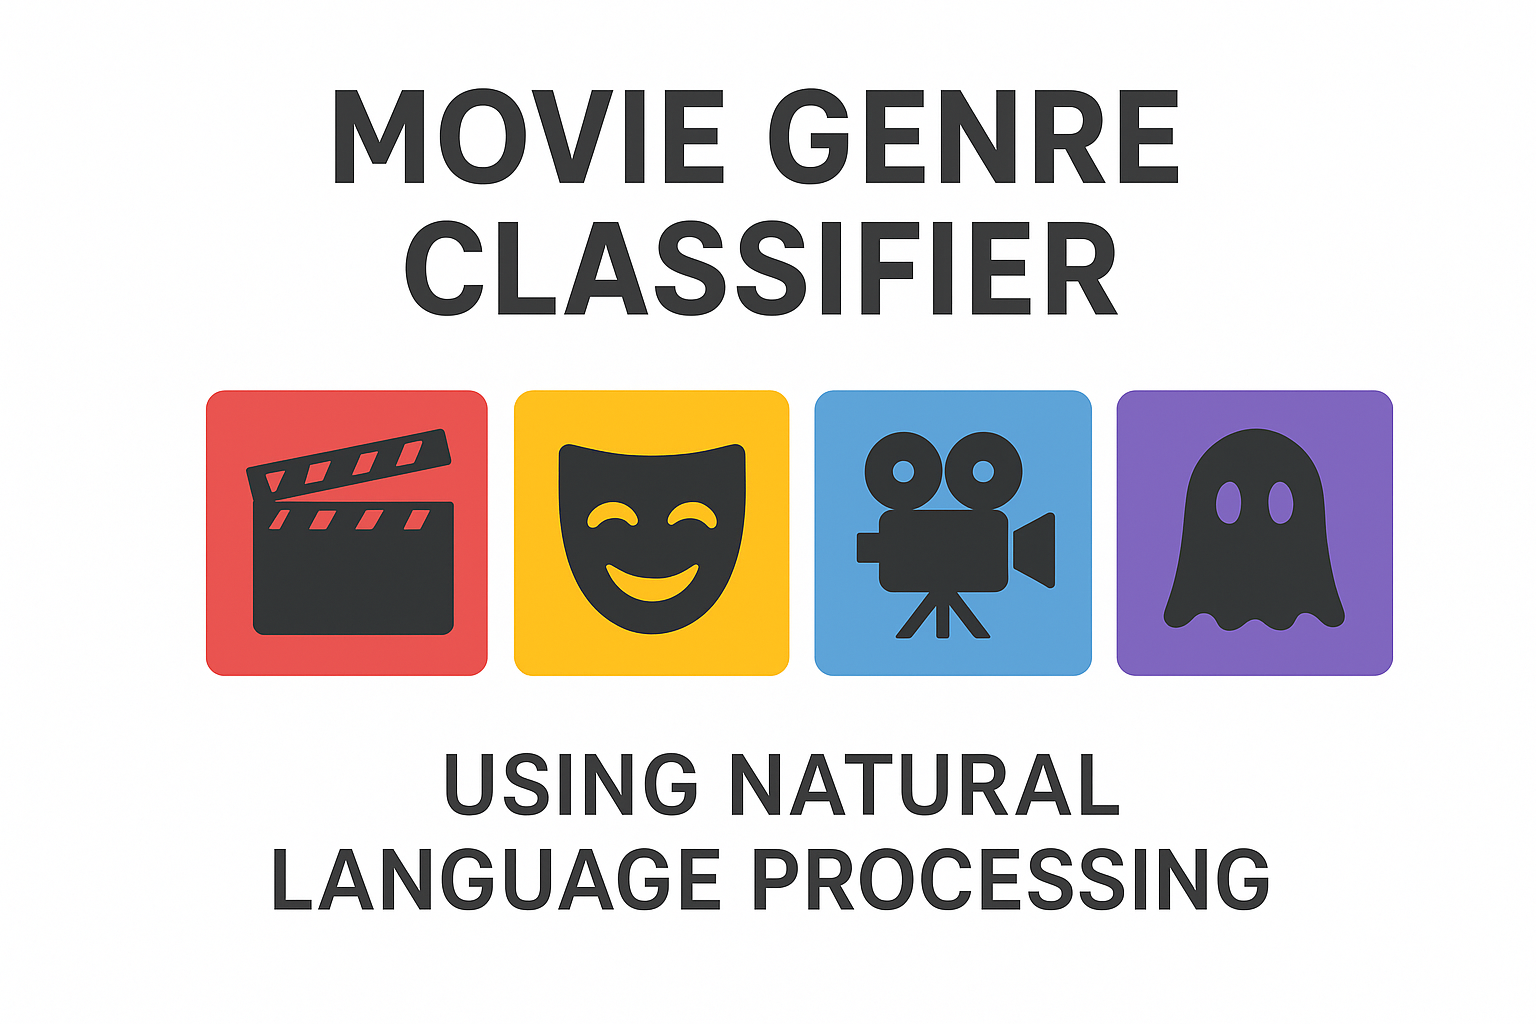

# **Movies Genre Classifier**
The Movies Genre Classifier project aims to automatically predict the genre of a movie based on its plot summary or script using Natural Language Processing (NLP) techniques. Text data from movies often contains diverse vocabulary, expressions, and contextual cues that can indicate the underlying genre, such as action, comedy, drama, or horror.

In this project, the preprocessing pipeline involves cleaning the text by removing special characters, converting text to lowercase, tokenizing into individual words, removing stop words, and applying stemming to reduce words to their root forms. These steps ensure that the textual data is normalized and ready for feature extraction.

A Multinomial Naïve Bayes (MultinomialNB) model is employed for classification, which is particularly well-suited for text classification tasks involving word frequency features. The final model predicts movie genres efficiently, leveraging a well-prepared corpus built from the preprocessed data.

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('/content/kaggle_movie_train.csv')

# **Exploring the Dataset**

In [3]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [4]:
df.tail()

,id,text,genre
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action
22578,28166,"rd walks off down the hallway, leaving his pos...",comedy


In [5]:
df.shape

(22579, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [7]:
df.describe()

,id
count,22579.000000
mean,14134.852651
std,8132.614667
min,0.000000
25%,7096.500000
50%,14168.000000
75%,21159.000000
max,28166.000000


In [8]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

# **Data Visualization**

/tmp/ipython-input-3443139533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index, palette='viridis')


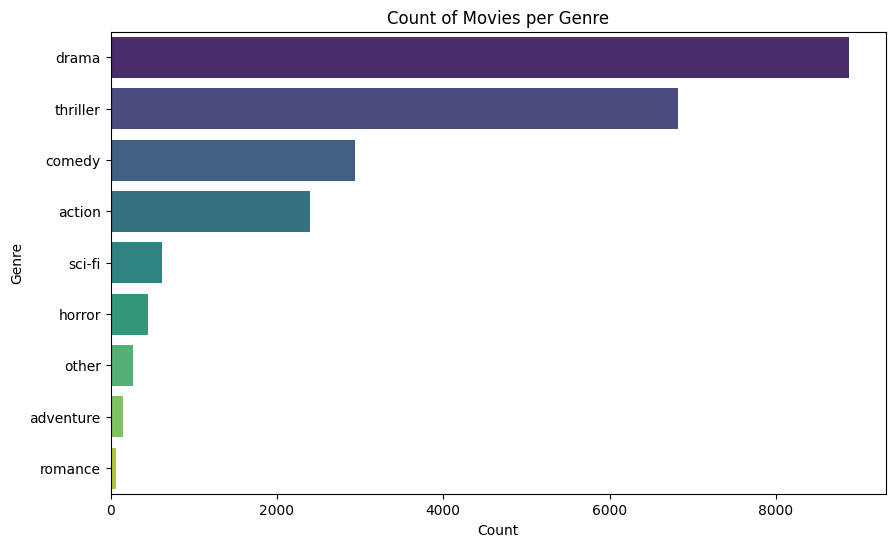

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index, palette='viridis')
plt.title('Count of Movies per Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# **Data Cleaning and Preprocessing**

In [10]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [11]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4


In [12]:
# Finding any NaN values
df.isna().any()

,0
id,False
text,False
genre,False


In [13]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns
df.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,"t, summa cum laude and all. And I'm about to l...",3
2,"up Come, I have a surprise.... She takes him ...",4
3,ded by the two detectives. INT. JEFF'S APARTME...,8
4,"nd dismounts, just as the other children reach...",4


In [14]:
!pip install nltk

In [15]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
df.shape

(22579, 2)

In [17]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [18]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [19]:
df[df['genre']==4].index

Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,    16,
       ...
       22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574, 22575],
      dtype='int64', length=8873)

In [20]:
len(corpus)

22579

In [21]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

# **WordCloud**

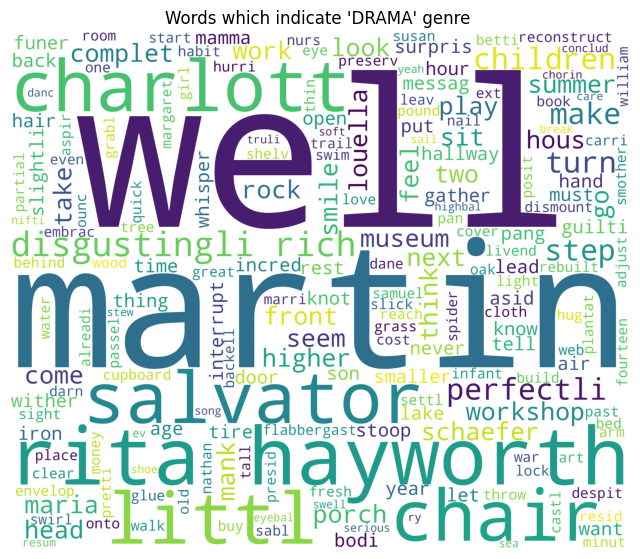

In [22]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

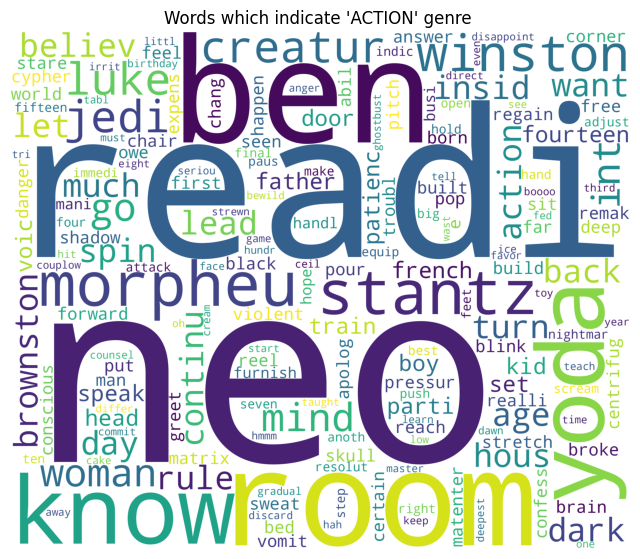

In [23]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

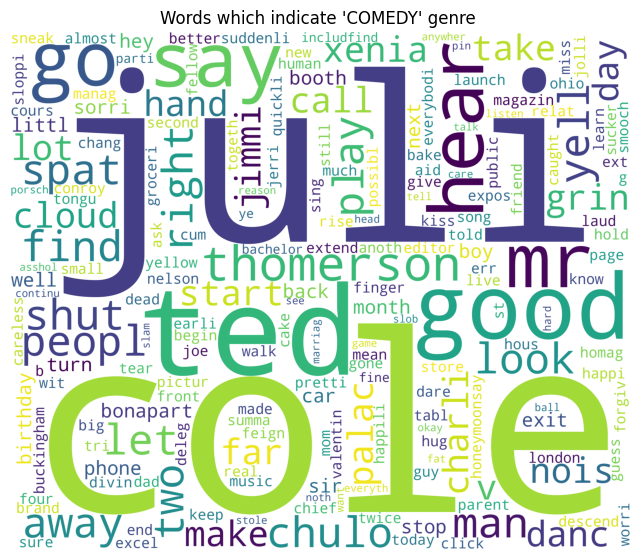

In [24]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

# **MODEL BUILDING**

In [25]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [26]:
y = df['genre'].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


In [28]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [29]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [30]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   41,    1,   37, 1607,   21,    2,   11,  104],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    1,    7,    1,    0,  114,    7],
       [   0,   14,    0,   21,   78,   12,    0,   22, 1171]])

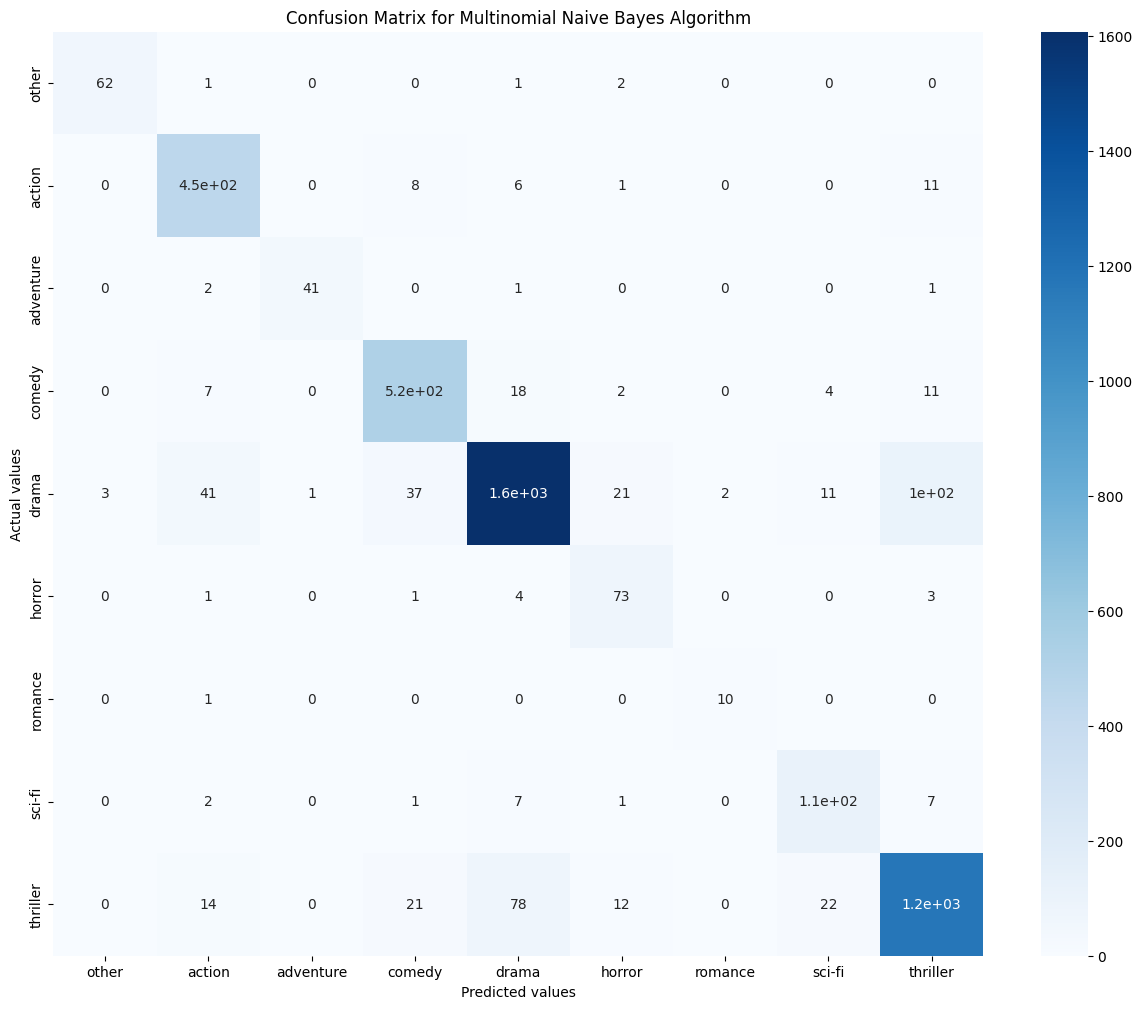

In [33]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [34]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.41%
Accuracy score for alpha=0.2 is: 91.14%
Accuracy score for alpha=0.3 is: 90.88%
Accuracy score for alpha=0.4 is: 90.66%
Accuracy score for alpha=0.5 is: 90.39%
Accuracy score for alpha=0.6 is: 90.17%
Accuracy score for alpha=0.7 is: 90.08%
Accuracy score for alpha=0.8 is: 89.99%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.41% with alpha value as 0.1


In [35]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [36]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [37]:
# For generating random integer
from random import randint
# Loading test dataset
test = pd.read_csv('/content/kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [38]:
test.shape

(5589, 2)

In [39]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [40]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ib? M.J. Yessir. I have reflected on that, sir. Which explains my gushing deference to you, sir. QUINN is somehow cheered by this little exchange. QUINN Nikko's looking better by the minute, Inspector. He stomps off. CUT TO INT. HELEN'S LIVING ROOM DAY HELEN on couch, ANDY is massaging her neck. HELEN Oh, God. I must have looked horrible. ANDY No, dear. You're at your best with a bag in front of your face. HELEN I want to die. ANDY I wouldn't. He'll be back. If you want him. The cute brutal type with handcuffs. Very sexy. HELEN grins, and ANDY starts to tickle her, she laughs. ANDY You thought he was cute too, didn't you? Admit... admit... HELEN now laughing a little too hard. Suddenly the laughter changes to tears. ANDY What? What'd I do? HELEN Reminded me that I used to be attractive. That men used to want me... ANDY You slut ! No sexy young cop for you unless you shampoo your hair. She clings desperately to him. He rocks her as he would a small child. ANDY When are you going

In [41]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ts. MRS. PILLETTI So what are you gonna do tonight, Marty? MARTY I don't know, Ma. I'm all knocked out. I think I'll just hang arounna house and watch... Suddenly he pauses, sharply aware of the repetition in his life. Mrs. Pilletti is also aware of it. MARTY Maybe, I'll go out and see what Angie and the boys are doing... They eat silently a moment. 187TH STREET. BAR. NIGHT. CLOSE UP of Marty leaning against the wall in front of the bar. A group of young men lounge about, killing time. Angie, Leo and Joe are among them. There are perhaps four or five other young MEN, loosely divided into two groups. The group that concerns us has Marty and the others mentioned and GEORGE, a young man in a sport jacket. LEO What time is it? JOE About eight o'clock. ANGIE to George You don't feel like going downna Seventy Second Street? GEORGE It'll take an hour anna hour back, and the whole evening's gone. JOE What's playing on Fordham Road? I think there's a good picture in the Loew's Paradise.

# Task
Create a Gradio interface to predict the genre of a movie script using the trained Multinomial Naive Bayes model and CountVectorizer.

## Save the trained model

### Subtask:
Save the trained `MultinomialNB` model and the `CountVectorizer` to disk so they can be loaded later for the Gradio interface.


**Reasoning**:
Save the trained Naive Bayes model and the CountVectorizer object to disk using joblib.



In [42]:
import joblib

joblib.dump(classifier, 'nb_model.joblib')
joblib.dump(cv, 'vectorizer.joblib')

['vectorizer.joblib']

## Load the model and vectorizer

### Subtask:
Create a new code cell to load the saved model and vectorizer.


**Reasoning**:
Load the saved model and vectorizer using joblib.



In [43]:
loaded_model = joblib.load('nb_model.joblib')
loaded_vectorizer = joblib.load('vectorizer.joblib')

## Define the prediction function

### Subtask:
Create a Python function that takes raw text as input, preprocesses it using the loaded vectorizer, and then uses the loaded model to predict the genre. This function will be used by the Gradio interface.


**Reasoning**:
Define a function to preprocess the input text, vectorize it, and predict the genre using the loaded model and vectorizer.



In [44]:
def predict_genre(sample_script):
  """Predicts the genre of a movie script.

  Args:
    sample_script: The raw text of the movie script.

  Returns:
    The predicted genre name.
  """
  # Preprocessing the input script
  sample_script = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if word not in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  # Vectorizing the preprocessed script
  temp = loaded_vectorizer.transform([final_script]).toarray()

  # Predicting the genre
  prediction = loaded_model.predict(temp)[0]

  # Mapping the predicted value back to genre name
  predicted_genre = None
  for genre_name, genre_value in genre_mapper.items():
    if genre_value == prediction:
      predicted_genre = genre_name
      break

  return predicted_genre

## Create the gradio interface

### Subtask:
Use the `gradio` library to create a simple web interface. This interface will take a text input (for the movie script) and output the predicted genre.


**Reasoning**:
Import the gradio library and define the Gradio interface.



In [45]:
import gradio as gr

iface = gr.Interface(
    fn=predict_genre,
    inputs=gr.Textbox(label="Enter Movie Script"),
    outputs=gr.Label(label="Predicted Genre")
)

**Reasoning**:
Launch the Gradio interface.



In [46]:
iface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4b4dd28c8a386f1ec5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://4b4dd28c8a386f1ec5.gradio.live


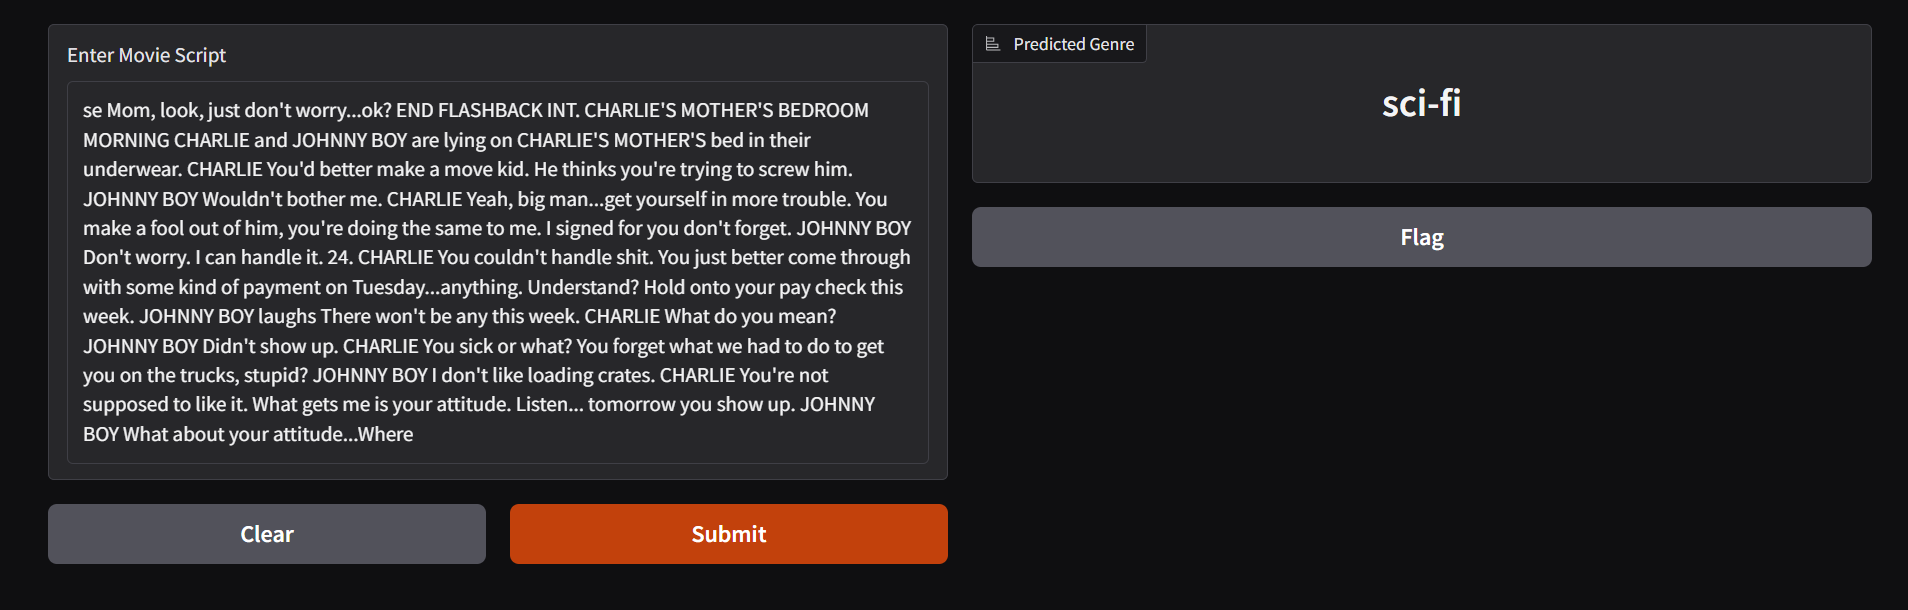

# **THE END!**